📒 [NB 4-2] 두 집단 간 평균 비교 (T-test)
1. 환경 설정 및 패키지 설치
통계 검정을 위해 scipy 패키지의 stats 모듈을 사용한다.

In [1]:
!pip install pandas numpy scipy seaborn matplotlib

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

print("라이브러리 로드 완료.")

라이브러리 로드 완료.


2. 가설 설정 및 데이터 생성
시나리오: 고혈압 신약 'Drug_A'와 기존 약물 'Control'의 효과를 비교한다.
귀무가설(H0): 두 그룹의 투약 후 수축기 혈압 평균 차이는 없다.
대립가설(H1): 두 그룹의 투약 후 수축기 혈압 평균 차이는 있다.

In [2]:
np.random.seed(101)

# Group A (신약): 평균 125, 표준편차 10
group_a = np.random.normal(125, 10, 50)

# Group B (대조군): 평균 132, 표준편차 10 (혈압이 더 높음)
group_b = np.random.normal(132, 10, 50)

df_ttest = pd.DataFrame({
    'Group': ['Drug_A']*50 + ['Control']*50,
    'SBP': np.concatenate([group_a, group_b])
})

print("그룹별 평균 혈압:")
print(df_ttest.groupby('Group')['SBP'].mean())

그룹별 평균 혈압:
Group
Control    132.646260
Drug_A     127.681138
Name: SBP, dtype: float64


3. 데이터 시각화 (Boxplot)
검정 전에 눈으로 차이를 확인한다.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11884\771434406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='SBP', data=df_ttest, palette='Set2')


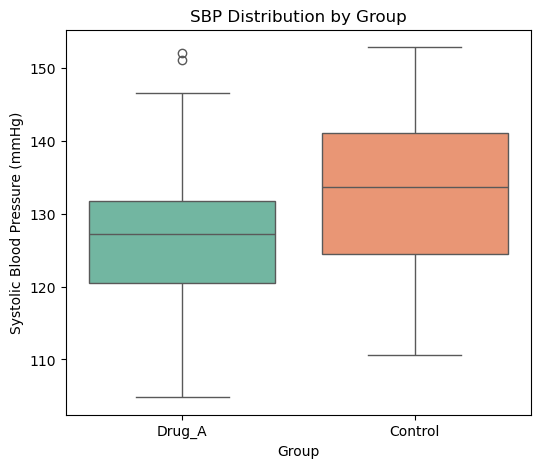

In [3]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Group', y='SBP', data=df_ttest, palette='Set2')
plt.title('SBP Distribution by Group')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

4. 독립 표본 T-test 수행 (Independent Two-Sample T-test)
두 집단이 서로 독립적이므로 독립 표본 T-검정을 수행한다. (등분산성은 만족한다고 가정한다.)

In [4]:
# ttest_ind 함수 사용
t_stat, p_val = stats.ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.10f}") # 소수점 10자리까지 표시

T-statistic: -2.3888
P-value: 0.0188177787


5. 결과 해석 및 결론 도출
P-value를 0.05(유의수준)와 비교하여 결론을 내린다.

In [5]:
alpha = 0.05

if p_val < alpha:
    print(f"\n[결과] P-value({p_val:.4f})가 0.05보다 작습니다.")
    print("-> 귀무가설을 기각합니다. 두 그룹 간 혈압 차이는 통계적으로 유의미합니다.")
    print("-> 즉, Drug_A는 Control군과 다른 효과를 보입니다.")
else:
    print(f"\n[결과] P-value({p_val:.4f})가 0.05보다 큽니다.")
    print("-> 귀무가설을 기각할 수 없습니다. 차이는 우연일 가능성이 높습니다.")


[결과] P-value(0.0188)가 0.05보다 작습니다.
-> 귀무가설을 기각합니다. 두 그룹 간 혈압 차이는 통계적으로 유의미합니다.
-> 즉, Drug_A는 Control군과 다른 효과를 보입니다.
